# Theft is the Most Common Crime in San Francisco's Southern District  
The goal of this project is to identify the highest crime area, by police precinct, in San Francisco and the most commonly occurring type of crime there. For this project, I will use the 2014 San Francisco crime data.  

The data for this assignment and instructions can be found here: 
https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/crimeanalytics.md   

## Approach  
I chose to use the R programming language and a Jupyter notebook for reproducibility. The R programming language is open source, and can be used to efficiently manipulate data and generate visualizations. The visualizations will be done with ggplot2. Jupyter notebooks allow the interleaving of code and text to support the literate programming paradigm and reproducible research.  

I will begin the analysis with a load of the data and quick exploration.  
After the review of the data, I will create an exploratory plot or two. Based on the information gained, I will narrow down the scope of the plots to look at the most commonly occurring crime in the highest crime area.

In [11]:
library(ggplot2)
library(lubridate)
sf_data <- read.csv("sanfrancisco_incidents_summer_2014.csv", stringsAsFactors = FALSE)

#what are the categories of crimes?
unique(sf_data$Category)

#how many records have missing data?
missing <- nrow(sf_data[!complete.cases(sf_data),])

#how many records total?
num_rows <- nrow(sf_data)

[1] "ARSON"                       "NON-CRIMINAL"               
 [3] "LARCENY/THEFT"               "DRUG/NARCOTIC"              
 [5] "DRIVING UNDER THE INFLUENCE" "OTHER OFFENSES"             
 [7] "TRESPASS"                    "VEHICLE THEFT"              
 [9] "ASSAULT"                     "FRAUD"                      
[11] "SUSPICIOUS OCC"              "SECONDARY CODES"            
[13] "WEAPON LAWS"                 "MISSING PERSON"             
[15] "WARRANTS"                    "ROBBERY"                    
[17] "DRUNKENNESS"                 "PROSTITUTION"               
[19] "LIQUOR LAWS"                 "KIDNAPPING"                 
[21] "FAMILY OFFENSES"             "LOITERING"                  
[23] "DISORDERLY CONDUCT"          "FORGERY/COUNTERFEITING"     
[25] "EMBEZZLEMENT"                "BURGLARY"                   
[27] "SUICIDE"                     "VANDALISM"                  
[29] "STOLEN PROPERTY"             "RUNAWAY"                    
[31] "GAMBLING"                    "EXTORTION"                  
[33] "PORNOGRAPHY/OBSCENE MAT"     "BRIBERY"

## Analysis  
After taking a quick look at the data, I then began with an exploratory plot to group crime by district.  

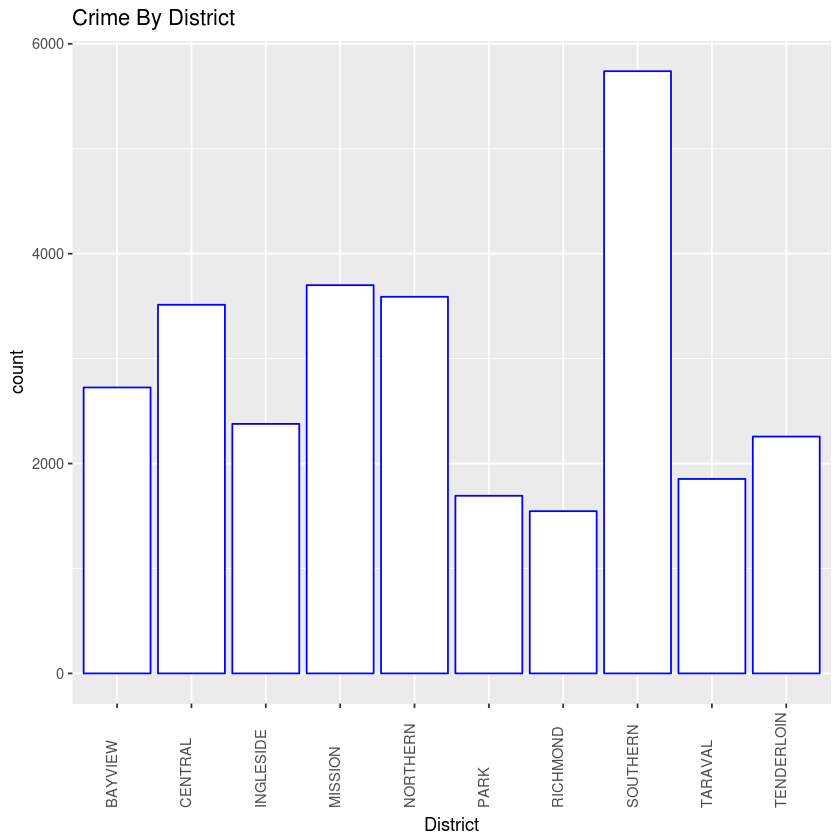

In [12]:
g <- ggplot(sf_data, aes(x=PdDistrict)) + geom_bar(colour="blue", fill="white")
g <- g + theme(axis.text.x = element_text(angle=90, hjust=0, vjust=0))
g <- g + xlab("District") + ggtitle("Crime By District")
print(g)

### Finding
From the above plot, it is clear that the Southern district has the highest crime rate.  


Next, I wanted a breakdown of crime by type in the southern district to see which crime was the most common. This will be done by filtering the San Francisco data to focus on the Southern district. I will then plot the crime by type in this district.  


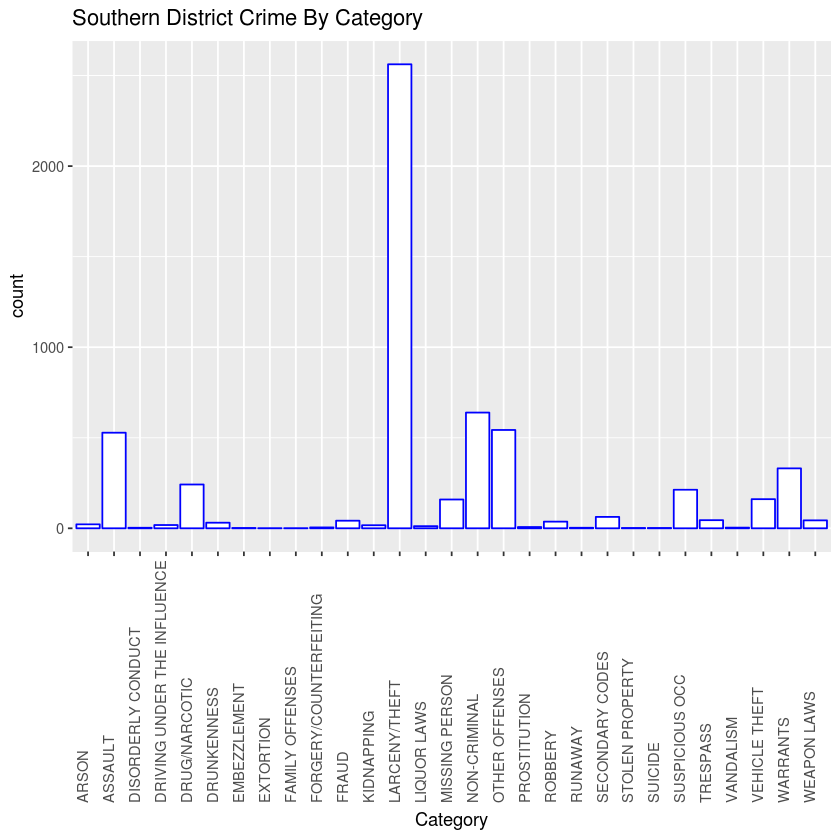

In [13]:
#southern district crime by type
sf_southern <- sf_data[sf_data$PdDistrict == "SOUTHERN",]


g <- ggplot(sf_southern, aes(x=Category)) + geom_bar(colour="blue", fill="white")
g <- g + theme(axis.text.x = element_text(angle=90, hjust=0, vjust=0))
g <- g + xlab("Category") + ggtitle("Southern District Crime By Category")
print(g)


### Finding  
The category "Larceny/Theft" is far and away the most common crime in San Francisco's Southern district.  

Curious, I wanted to see if this was true in the other districts as well. I did this by adding a color to correspond to the district, and plotting the crime data for all of San Francisco.  


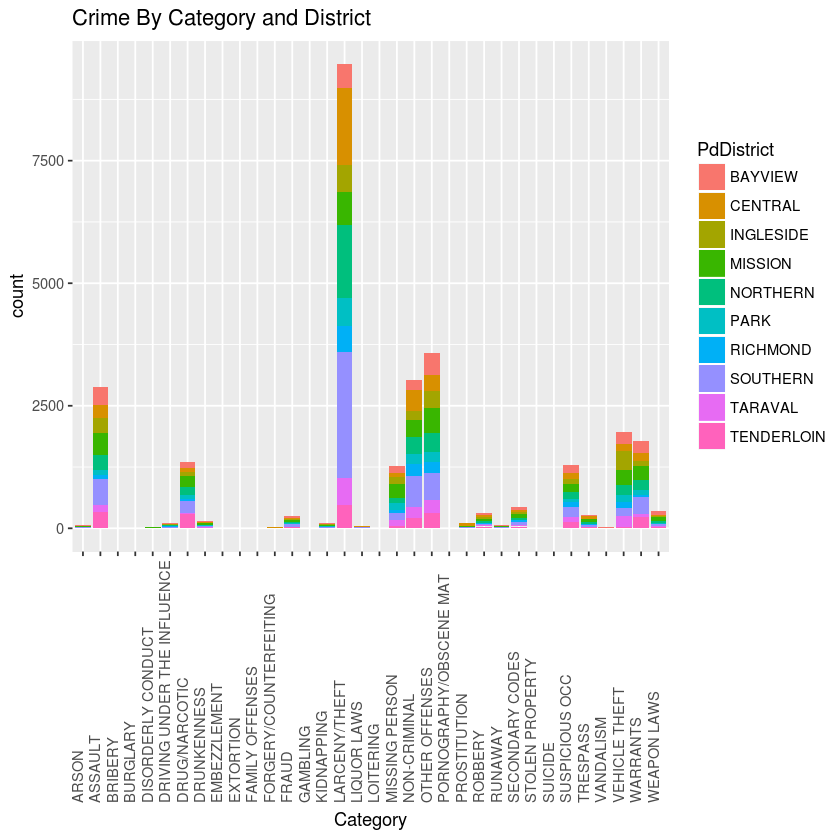

In [14]:
#crime by district and type
g <- ggplot(sf_data, aes(x=Category, fill=PdDistrict)) + geom_bar()
g <- g + theme(axis.text.x = element_text(angle=90, hjust=0, vjust=0))
g <- g + xlab("Category") + ggtitle("Crime By Category and District")
print(g)

Larceny/Theft dominates the crimes committed in the San Francisco area.  

Next I wanted to see when crimes were most likely to occurr in the Southern district area. To do this, I will use a simple regular expression to create an hour feature within the data.

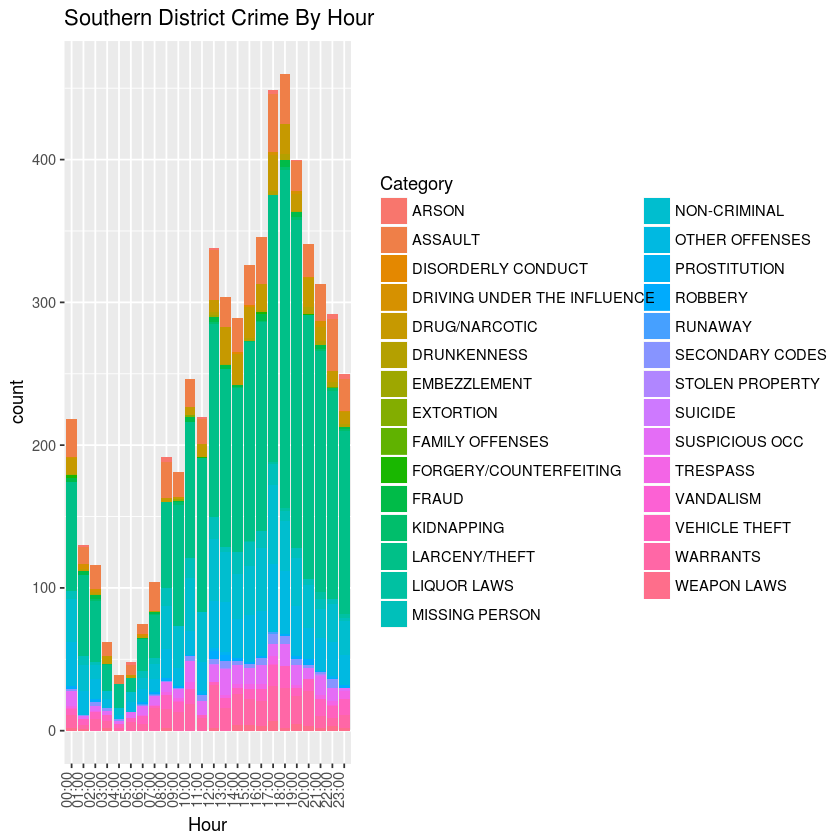

In [15]:
#southern district crime by hour
#create an "hour" attribute to reduce the granularity of the time data
sf_southern$Hour <- sapply(sf_southern$Time, function(x) { 
  hr <- unlist(strsplit(x, ":"))[1]
  return(paste0(hr,":00"))
})

g <- ggplot(sf_southern, aes(x=Hour, fill=Category)) + geom_bar()
g <- g + theme(axis.text.x = element_text(angle=90, hjust=0, vjust=0)) + ggtitle("Southern District Crime By Hour")
print(g)

## Conclusion  
The plot above clearly shows a pattern of crime being committed most commonly in the early evening with a decrease after midnight, until the crimes committed reaches a low around 4am in the morning.  

Based on the analysis of the data, I conclude the following:  
* San Francisco's Southern district has the highest rate of crime.  
* Larceny/Theft is the most common form of crime.  
* Crime is at its lowest in the early morning hours and highest in the early evening hours.  


